In [1]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import interactive
from fmriprep_denoise.visualization import utils

path_root = utils.get_data_root() / "denoise-metrics"
strategy_order = list(utils.GRID_LOCATION.values())
group_order = {'ds000228': ['adult', 'child'],  'ds000030': ['control', 'ADHD', 'bipolar', 'schizophrenia']}
datasets = ['ds000228', 'ds000030']
datasets_baseline = {'ds000228': 'adult', 'ds000030': 'control'}

# Results: dataset level

Here we provides alternative visualisation of the benchmark results from the manuscript.
Please click on the launch botton to lunch the Binder instance for interactive data viewing.

The benchmark was performed on two Long-Term Support (LTS) versions of fMRIPrep (20.2.1 and 20.2.5) and two OpenNeuro datasets (ds000228 and ds000030).
For the demographic information and gross mean framewise displacement, it is possible to generate the report based on three levels of quality control filters (no filter, minimal, stringent).

## Sample and subgroup size change based on quality control criteria

We would like to perform the benchmark on subjects with reasonable qulaity of data to reflect the descisions researchers make in data analysis. 
We modified the criteria for filtering data from Parkes 2018 to suit our dataset better and ensure enough time points for functional connectivity analysis.

The stringent threshold removes subjects based on two criteria:
1. removes subjects with mean framewise displacement above 0.25 mm
2. removes subjects with more than 80% of the volumes missing when filtering the time series with a 0.2 mm framewise displacement.

Parkes 2018 used a stricter criteria for remaining volumes (20%). However this will removed close to or more than 50% of the subjects from the datasets. 

In addition, we included the minimal threshold from Parkes 2018
(removes subjects with mean framewise displacement above 0.55 mm)
for readers to expore.

In [2]:
import pandas as pd
from fmriprep_denoise.visualization import tables
from fmriprep_denoise.features.derivatives import get_qc_criteria

def demographic_table(criteria_name, fmriprep_version):
    criteria = get_qc_criteria(criteria_name)
    ds000228 = tables.lazy_demographic('ds000228', fmriprep_version, path_root, **criteria)
    ds000030 = tables.lazy_demographic('ds000030', fmriprep_version, path_root, **criteria)

    desc = pd.concat({'ds000228': ds000228, 'ds000030': ds000030}, axis=1, names=['dataset'])
    desc = desc.style.set_table_attributes('style="font-size: 12px"')
    print("Generating new tables...")

    display(desc)

criteria_name = widgets.Dropdown(
    options=['stringent', 'minimal', None],
    value='stringent',
    description='Threshould: ',
    disabled=False
)
fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)
interactive(demographic_table, criteria_name=criteria_name, fmriprep_version=fmriprep_version)

interactive(children=(Dropdown(description='Threshould: ', options=('stringent', 'minimal', None), value='stri…

You can also use different exclusion criteria to explore the motion profiles of different subgroups in the dataset.


## Motion profile of each dataset

We can see overall the adults have less gross motion than children in ds000228. 
Between different clinical groups in ds000030, the schizophrania group displays a marked difference in motion comparing to the healthy control.

In [3]:
from fmriprep_denoise.visualization import mean_framewise_displacement


def notebook_plot_mean_fd(criteria_name, fmriprep_version):
    stats = mean_framewise_displacement.load_data(path_root, criteria_name, fmriprep_version) 
    mean_framewise_displacement.plot_stats(stats)

    
criteria_name = widgets.Dropdown(
    options=['stringent', 'minimal', None],
    value='stringent',
    description='Threshould: ',
    disabled=False
)
fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)
interactive(notebook_plot_mean_fd, criteria_name=criteria_name, fmriprep_version=fmriprep_version)

interactive(children=(Dropdown(description='Threshould: ', options=('stringent', 'minimal', None), value='stri…

## Similarity amongst denoised connectomes

We plotted the correlations among connectomes denoised with different denoisng strategies to get a general sense of the data.

We see connectome denoised with or without global signal regressor.formed two separate clusters.
The baseline and ICA-AROMA denoised connectome do not belong to any clusters. 
ICA-AROMA potentially captures much more different source of noise than the others.

In [4]:
from fmriprep_denoise.visualization import connectivity_similarity

def notebook_plot_connectomes(fmriprep_version):
    average_connectomes = connectivity_similarity.load_data(path_root, datasets, fmriprep_version) 
    connectivity_similarity.plot_stats(average_connectomes)


fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)
interactive(notebook_plot_connectomes, fmriprep_version=fmriprep_version)

interactive(children=(Dropdown(description='Preporcessing version : ', options=('fmriprep-20.2.1lts', 'fmripre…

## Loss of temporal degrees of freedom

In [5]:
from fmriprep_denoise.visualization import degrees_of_freedom_loss

def notebook_plot_loss_degrees_of_freedom(criteria_name, fmriprep_version):
    data = degrees_of_freedom_loss.load_data(path_root, datasets, criteria_name, fmriprep_version) 
    degrees_of_freedom_loss.plot_stats(data)

criteria_name = widgets.Dropdown(
    options=['stringent', 'minimal', None],
    value='stringent',
    description='Threshould: ',
    disabled=False
)

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_loss_degrees_of_freedom, criteria_name=criteria_name, fmriprep_version=fmriprep_version)

interactive(children=(Dropdown(description='Threshould: ', options=('stringent', 'minimal', None), value='stri…

## Quality control / functional connectivity (QC-FC)

In [6]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_qcfc(criteria_name, fmriprep_version):
    data, measure = motion_metrics.load_data(path_root, datasets, criteria_name, fmriprep_version, 'p_values')
    motion_metrics.plot_stats(data, measure)
    
# criteria_name = widgets.Dropdown(
#     options=['stringent', 'minimal', None],
#     value='stringent',
#     description='Threshould: ',
#     disabled=False
# )

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_qcfc, criteria_name='stringent', fmriprep_version=fmriprep_version)

interactive(children=(Text(value='stringent', description='criteria_name'), Dropdown(description='Preporcessin…

### False discovery rate corrected QC-FC

In [7]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_qcfc_fdr(criteria_name, fmriprep_version):
    data, measure = motion_metrics.load_data(path_root, datasets, criteria_name, fmriprep_version, 'fdr_p_values')
    motion_metrics.plot_stats(data, measure)

    
# criteria_name = widgets.Dropdown(
#     options=['stringent', 'minimal', None],
#     value='stringent',
#     description='Threshould: ',
#     disabled=False
# )

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_qcfc_fdr, criteria_name='stringent', fmriprep_version=fmriprep_version)

interactive(children=(Text(value='stringent', description='criteria_name'), Dropdown(description='Preporcessin…

### Medians of absolute values of QC-FC

In [8]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_qcfc_median(criteria_name, fmriprep_version):
    data, measure = motion_metrics.load_data(path_root, datasets, criteria_name, fmriprep_version, 'median')
    motion_metrics.plot_stats(data, measure)

    
# criteria_name = widgets.Dropdown(
#     options=['stringent', 'minimal', None],
#     value='stringent',
#     description='Threshould: ',
#     disabled=False
# )

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_qcfc_median, criteria_name='stringent', fmriprep_version=fmriprep_version)

interactive(children=(Text(value='stringent', description='criteria_name'), Dropdown(description='Preporcessin…

## Residual distance-dependent effects of subject motion on functional connectivity (DM-FC)

In [9]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_distance(criteria_name, fmriprep_version):
    data, measure = motion_metrics.load_data(path_root, datasets, criteria_name, fmriprep_version, 'distance')
    motion_metrics.plot_stats(data, measure)

    
# criteria_name = widgets.Dropdown(
#     options=['stringent', 'minimal', None],
#     value='stringent',
#     description='Threshould: ',
#     disabled=False
# )

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_distance, criteria_name='stringent', fmriprep_version=fmriprep_version)

interactive(children=(Text(value='stringent', description='criteria_name'), Dropdown(description='Preporcessin…

## Louvain network modularity

In [10]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_modularity(criteria_name, fmriprep_version):
    data, measure = motion_metrics.load_data(path_root, datasets, criteria_name, fmriprep_version, 'modularity')
    motion_metrics.plot_stats(data, measure)

    
# criteria_name = widgets.Dropdown(
#     options=['stringent', 'minimal', None],
#     value='stringent',
#     description='Threshould: ',
#     disabled=False
# )

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_modularity, criteria_name='stringent', fmriprep_version=fmriprep_version)

interactive(children=(Text(value='stringent', description='criteria_name'), Dropdown(description='Preporcessin…

### Average Pearson’s correlation between mean framewise displacement and Louvain network modularity after denoising

In [11]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_modularity_motion(criteria_name, fmriprep_version):
    data, measure = motion_metrics.load_data(path_root, datasets, criteria_name, fmriprep_version, 'modularity_motion')
    motion_metrics.plot_stats(data, measure)

    
# criteria_name = widgets.Dropdown(
#     options=['stringent', 'minimal', None],
#     value='stringent',
#     description='Threshould: ',
#     disabled=False
# )

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

interactive(notebook_plot_modularity_motion, criteria_name='stringent', fmriprep_version=fmriprep_version)

interactive(children=(Text(value='stringent', description='criteria_name'), Dropdown(description='Preporcessin…

### Correlation between mean framewise displacement and Louvain network modularity after denoising.

In [12]:
from fmriprep_denoise.visualization import motion_metrics

def notebook_plot_joint_scatter(dataset, base_strategy, fmriprep_version):
    motion_metrics.plot_joint_scatter(path_root, dataset, base_strategy, fmriprep_version)

    
dataset = widgets.Dropdown(
    options=['ds000228', 'ds000030'],
    value='ds000228',
    description='Dataset: ',
    disabled=False
)

fmriprep_version = widgets.Dropdown(
    options=['fmriprep-20.2.1lts', 'fmriprep-20.2.5lts'],
    value='fmriprep-20.2.1lts',
    description='Preporcessing version : ',
    disabled=False
)

base_strategy = widgets.Dropdown(
    options=['simple', 'srubbing.5', 'srubbing.2', 'aroma'],
    value='simple',
    description='Base denoise strategy ',
    disabled=False
)


interactive(notebook_plot_joint_scatter, dataset=dataset, base_strategy=base_strategy, fmriprep_version=fmriprep_version)

interactive(children=(Dropdown(description='Dataset: ', options=('ds000228', 'ds000030'), value='ds000228'), D…

## Ranking strategies from best to worst, based on four benchmark metrics

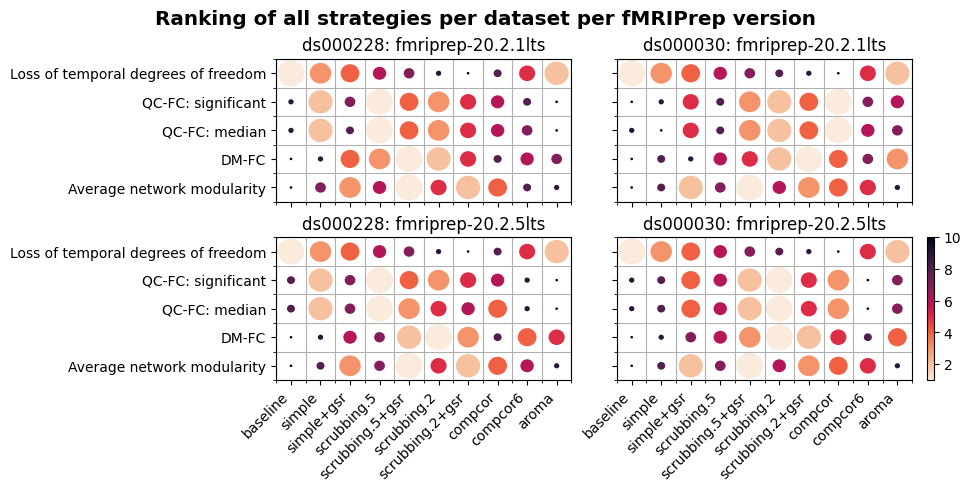

In [13]:
from fmriprep_denoise.visualization import strategy_ranking

data = strategy_ranking.load_data(path_root, datasets)
fig = strategy_ranking.plot_ranking(data)